## Margin Improvement through Customized Pricing

ZZ is an auto-parts retailer which sells a range of car parts and truck & trailer parts. Their customers could be individual garage owners with a single shop, or a larger chain of automobile workshops / in-house maintenance teams of fleet companies.

•ZZ has 350 locations across 40+ states of US, and have more than 100,000 parts that they sell in different categories (Transmission System, Engine Accessories, Cooling System, Lubes, HVAC systems, Tyres, Electricals, and Consumables). 
•Sales happen inside the store (no online), through customer – store associate interactions. Some sales also happen via delivery of products to customer locations. In both cases, ZZ’s associates could be interacting directly with the customer, or customer’s sales/procurement person. 

•As you can see, the business model is similar to classic retailing, but with some key differences: transactions are price negotiated between the customer & the store associate. Therefore, selling price vs base / recommended price being different. 

•While negotiated sales is a key feature of their business model, unscrupulous discounting could have a serious impact on the margins.

•ZZ likes to design a analytics driven discounting strategy, to provide a set of guidelines to the store associates on how to do smart pricing that results in a win-win for both the customers & ZZ. 
Attached is a sample data for one product category (Clutches).

Please outline your thoughts to help ZZ arrive at this strategy, backing up your recommendations with relevant analyses of the data provided. 
Depth of analyses, actionable insights, and how they could help address key business objectives + outcomes are all in focus for the audience.

In [512]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from scipy.stats import chi2_contingency
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


## Glossary of Features:
Trans_Num: Transaction number, a unique identifier for each sale.

Customer_Number: Unique identifier for the customer involved in the transaction.

Customer_Branch: Branch of the customer that made the purchase.

Sell_Date: Date on which the product was sold.

Customer_LSTYR_Sales: Sales made by the customer in the last year.

Product_id: Unique identifier for each product sold.

Part_Category: Category to which the product belongs (e.g., Transmission System, Engine Accessories).

Quantity_Shipped: Number of product units shipped in the transaction.

Selling_Price: The price at which the product was sold.

Selling_Cost: The cost incurred to ZZ for the product, excluding margins and other overheads.

Margin: The percentage profit on the product, calculated as a percentage of the selling price.

Base_Price: The original or recommended price for the product.

DCOST: Delivery cost or other additional costs incurred during the transaction.

Price_Cluster: A cluster or category of prices based on different pricing strategies.

Selling_Location: The store location where the sale occurred.

Location_Region: The region of the store location.

Customer_Salesman: The salesman responsible for the customer relationship.

Territory_Salesperson: The salesperson managing the entire territory where the store is located.

Territory_Names: Name of the sales territory.

Area_Manager: Manager responsible for overseeing sales activities in the area.

Area_Name: Name of the area where the store is located.

In [513]:
df=pd.read_excel('/Users/vallirajasekar/Desktop/New_project /Discount_Optimization/Experiment/0_Margin_Improvement_case_study_DS.docx_105553205264512.xlsx')

In [514]:
df['Sell_Date'] = pd.to_datetime(df['Sell_Date'], origin='1899-12-30',unit='D')

In [515]:
df.head()

,Trans_Num,Customer_Number,Customer_Branch,Sell_Date,Customer_LSTYR_Sales,product_id,Part_Category,Quantity_Shipped,Selling_Price,Selling_Cost,...,Base_Price,DCOST,Price_Cluster,Selling_Location,Location_Region,Customer_Salesman,Territory_Salesperson,Territory_Names,Area_Manager,Area_Name
0,77686701,1,0,2016-06-07,17.39,245_20970182,Clutch,1,929.17,628.980,...,929.17,628.98,PRC2,COI,WEST,154.0,TS222,SOCAL WEST,TF,SOUTHWEST CALIF
1,66829575,3501,0,2015-02-20,25813.55,245_20970182,Clutch,1,943.96,607.070,...,943.96,628.98,PRC1,AL,CENTRAL,16.0,OPEN,SOUTH TEXAS,DB1,SOUTH TEXAS
2,58890845,10070,0,2014-01-27,83574.66,245_20970182,Clutch,1,820.20,607.070,...,820.20,628.98,PRC1,CC,CENTRAL,109.0,TS251,SOUTH TEXAS,DB1,SOUTH TEXAS
3,73598323,10144,13,2015-11-18,78834.74,245_20970182,Clutch,1,868.80,622.748,...,868.80,628.98,PRC1,CC,CENTRAL,111.0,TS117,SOUTH TEXAS,DB1,SOUTH TEXAS
4,65139121,11404,22,2014-11-20,79565.88,245_20970182,Clutch,1,757.66,607.070,...,757.66,628.98,PRC1,CC,CENTRAL,3.0,TS251,SOUTH TEXAS,DB1,SOUTH TEXAS


In [516]:
print(df.shape)
print(df.info())

(5329, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5329 entries, 0 to 5328
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Trans_Num              5329 non-null   int64         
 1   Customer_Number        5329 non-null   int64         
 2   Customer_Branch        5329 non-null   int64         
 3   Sell_Date              5329 non-null   datetime64[ns]
 4   Customer_LSTYR_Sales   2377 non-null   float64       
 5   product_id             5329 non-null   object        
 6   Part_Category          5329 non-null   object        
 7   Quantity_Shipped       5329 non-null   int64         
 8   Selling_Price          5329 non-null   float64       
 9   Selling_Cost           5329 non-null   float64       
 10  margin                 5329 non-null   float64       
 11  Unnamed: 11            1 non-null      float64       
 12  Unnamed: 12            1 non-null      float64     

In [517]:
df.drop(['Unnamed: 11','Unnamed: 12'],axis=1,inplace=True)

## Features to Address:
1. (Selling_Cost * Margin) - Profit Value
This feature represents the total profit value for the sale based on the cost and margin percentage.
New Feature Name: Profit_Value

2. (Selling_Cost - Selling_Cost * Margin) - Cost after Margin
This represents the effective cost of the product after applying the margin (i.e., the leftover amount when the profit is subtracted from the selling cost).
New Feature Name: Cost_After_Margin

In [518]:
df['Profit_value']=df['Selling_Cost']*df['margin']
df['Cost_after_Margin']=df['Selling_Cost']-df['Profit_value']

In [519]:
#df['Discount_Offered'] = (df['Base_Price'] - df['Selling_Price']) / df['Base_Price']

#df['Excessive_Discount'] = df['Discount_Offered'].apply(lambda x: 1 if x > 0.15 else 0)

#df['Discount_Applied'] = df['Base_Price'] - df['Selling_Cost']






In [520]:
print(df.isnull().sum())
print(df.isnull().sum()/len(df)*100)

Trans_Num                   0
Customer_Number             0
Customer_Branch             0
Sell_Date                   0
Customer_LSTYR_Sales     2952
product_id                  0
Part_Category               0
Quantity_Shipped            0
Selling_Price               0
Selling_Cost                0
margin                      0
Base_Price                  0
DCOST                       0
Price_Cluster               0
Selling_Location            0
Location_Region             0
Customer_Salesman        2952
Territory_Salesperson       2
Territory_Names            24
Area_Manager                0
Area_Name                   0
Profit_value                0
Cost_after_Margin           0
dtype: int64
Trans_Num                 0.000000
Customer_Number           0.000000
Customer_Branch           0.000000
Sell_Date                 0.000000
Customer_LSTYR_Sales     55.395008
product_id                0.000000
Part_Category             0.000000
Quantity_Shipped          0.000000
Selling_Price    

In [521]:
df_1=df.copy()

## Exploration of Data

In [522]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 14 numerical features : ['Trans_Num', 'Customer_Number', 'Customer_Branch', 'Sell_Date', 'Customer_LSTYR_Sales', 'Quantity_Shipped', 'Selling_Price', 'Selling_Cost', 'margin', 'Base_Price', 'DCOST', 'Customer_Salesman', 'Profit_value', 'Cost_after_Margin']

We have 9 categorical features : ['product_id', 'Part_Category', 'Price_Cluster', 'Selling_Location', 'Location_Region', 'Territory_Salesperson', 'Territory_Names', 'Area_Manager', 'Area_Name']


In [523]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

product_id
245_20970182    100.0
Name: proportion, dtype: float64
---------------------------
Part_Category
Clutch    100.0
Name: proportion, dtype: float64
---------------------------
Price_Cluster
PRC2    36.779884
PRC3    31.413023
PRC1    22.443235
PRC4     8.632014
PRC0     0.731845
Name: proportion, dtype: float64
---------------------------
Selling_Location
ONT    3.865641
TOL    3.190092
WCA    2.946144
SLC    2.495778
ATL    2.214299
         ...   
DTS    0.018765
LAN    0.018765
CSH    0.018765
MAN    0.018765
HAS    0.018765
Name: proportion, Length: 235, dtype: float64
---------------------------
Location_Region
SOUTHEAST    35.222368
WEST         26.496528
NORTHEAST    20.210171
CENTRAL      18.070933
Name: proportion, dtype: float64
---------------------------
Territory_Salesperson
OPEN       7.302422
TS211      1.745823
CALL151    1.651962
TS309      1.520556
TS173      1.483011
             ...   
CALL73     0.018772
CALL111    0.018772
CALL103    0.018772
TS261      0

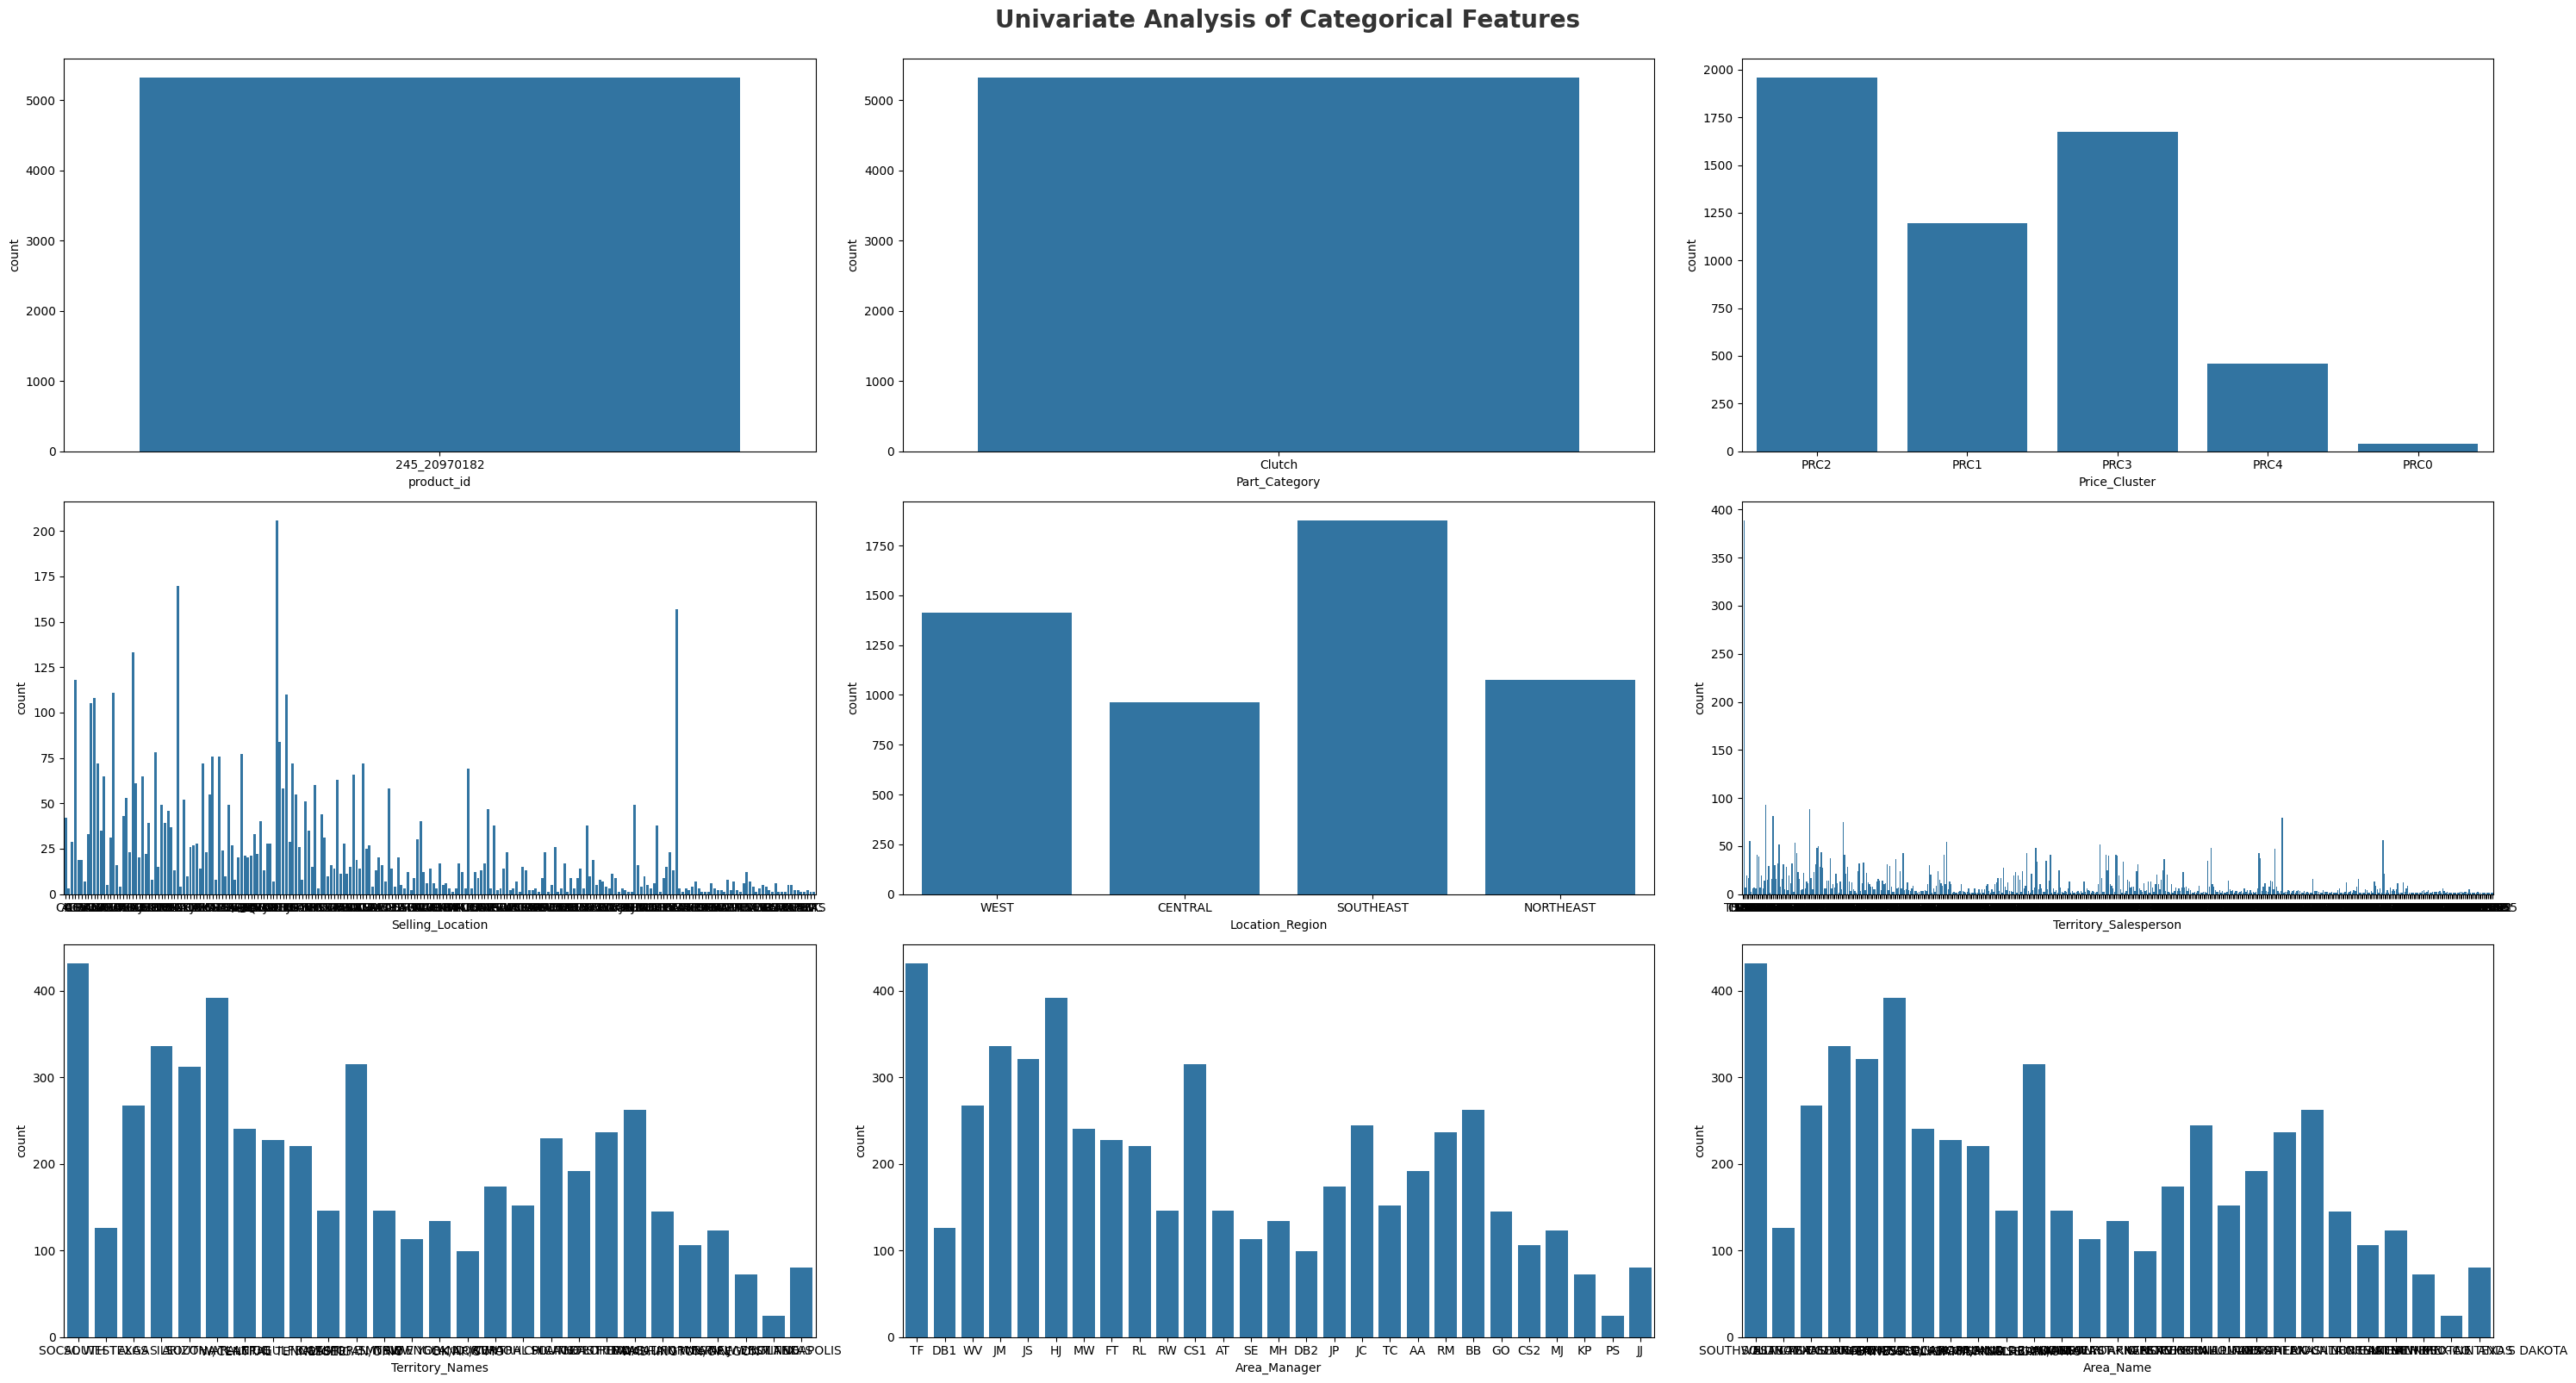

In [524]:
# categorical columns
#categorical_features.remove('case_id')
plt.figure(figsize=(30, 16))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

In [525]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 3 discrete features : ['Quantity_Shipped', 'Selling_Cost', 'DCOST']

We have 11 continuous_features : ['Trans_Num', 'Customer_Number', 'Customer_Branch', 'Sell_Date', 'Customer_LSTYR_Sales', 'Selling_Price', 'margin', 'Base_Price', 'Customer_Salesman', 'Profit_value', 'Cost_after_Margin']


In [526]:
df['Month']=df['Sell_Date'].dt.month
df['Year']=df['Sell_Date'].dt.year
df['Day']=df['Sell_Date'].dt.day
df.drop(['Sell_Date'],axis=1,inplace=True)

In [527]:
df_1['Month']=df_1['Sell_Date'].dt.month
df_1['Year']=df_1['Sell_Date'].dt.year
df_1['Day']=df_1['Sell_Date'].dt.day
df_1.drop(['Sell_Date'],axis=1,inplace=True)

In [528]:

chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['margin'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,product_id,Fail to Reject Null Hypothesis
1,Part_Category,Fail to Reject Null Hypothesis
2,Price_Cluster,Reject Null Hypothesis
3,Selling_Location,Reject Null Hypothesis
4,Location_Region,Reject Null Hypothesis
5,Territory_Salesperson,Reject Null Hypothesis
6,Territory_Names,Reject Null Hypothesis
7,Area_Manager,Reject Null Hypothesis
8,Area_Name,Reject Null Hypothesis


In [529]:
# Dropping the Product_id, Part_Catergory as it does not much contribute for our output 

df.drop(['product_id','Part_Category','Trans_Num', 'Customer_Number'],axis=1,inplace=True)

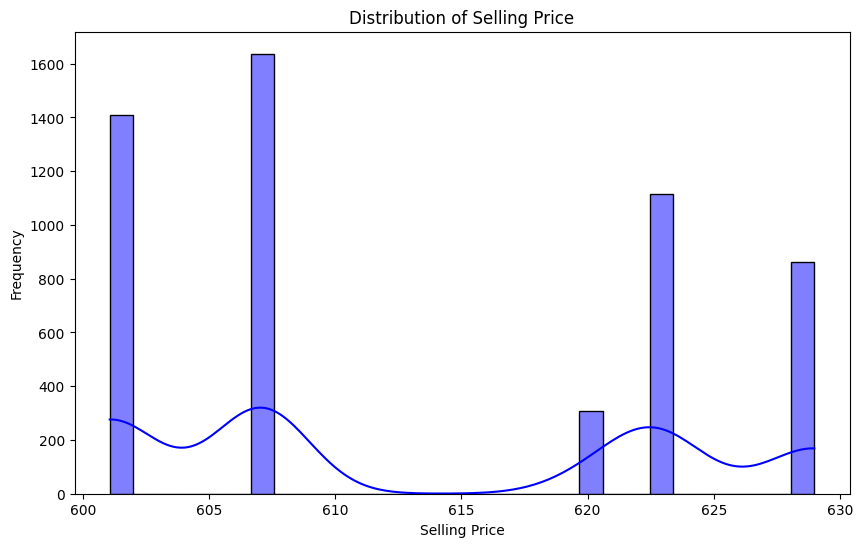

In [530]:
plt.figure(figsize=(10,6))
sns.histplot(df['Selling_Cost'], bins=30, kde=True, color='blue')
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


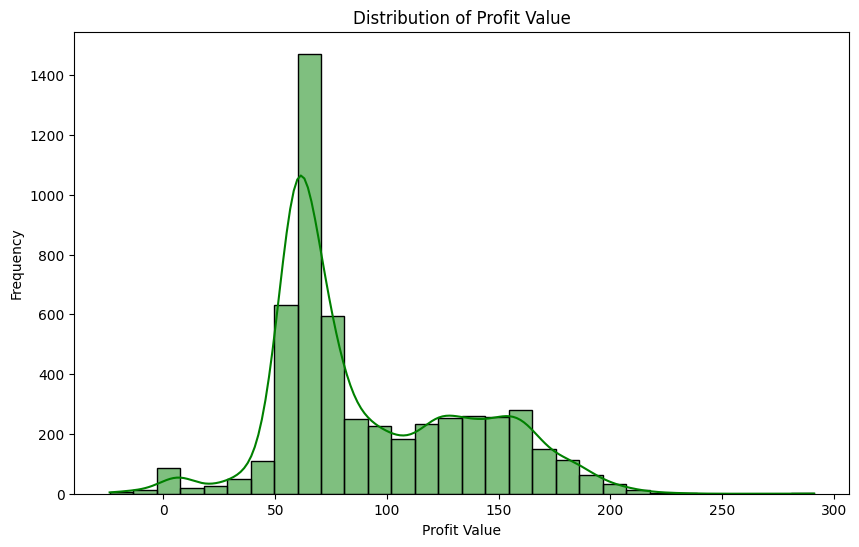

In [531]:
plt.figure(figsize=(10,6))
sns.histplot(df['Profit_value'], bins=30, kde=True, color='green')
plt.title('Distribution of Profit Value')
plt.xlabel('Profit Value')
plt.ylabel('Frequency')
plt.show()


/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_27115/3153996062.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Selling_Cost', y='Profit_value', data=df, palette='Set1')


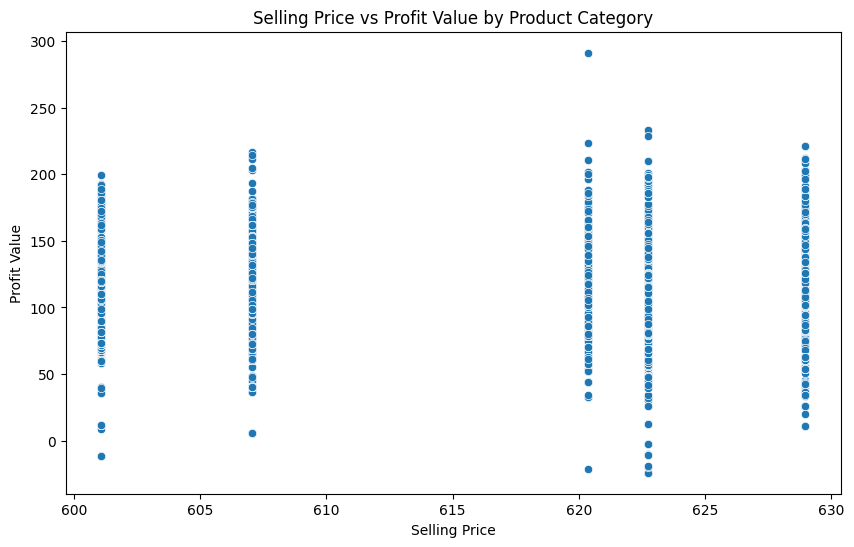

In [532]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Selling_Cost', y='Profit_value', data=df, palette='Set1')
plt.title('Selling Price vs Profit Value by Product Category')
plt.xlabel('Selling Price')
plt.ylabel('Profit Value')
plt.show()


/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_27115/260665059.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Customer_Branch', y='Quantity_Shipped', data=df_top_15_sales, ci=None, order=top_15_sales_branches['Customer_Branch'])


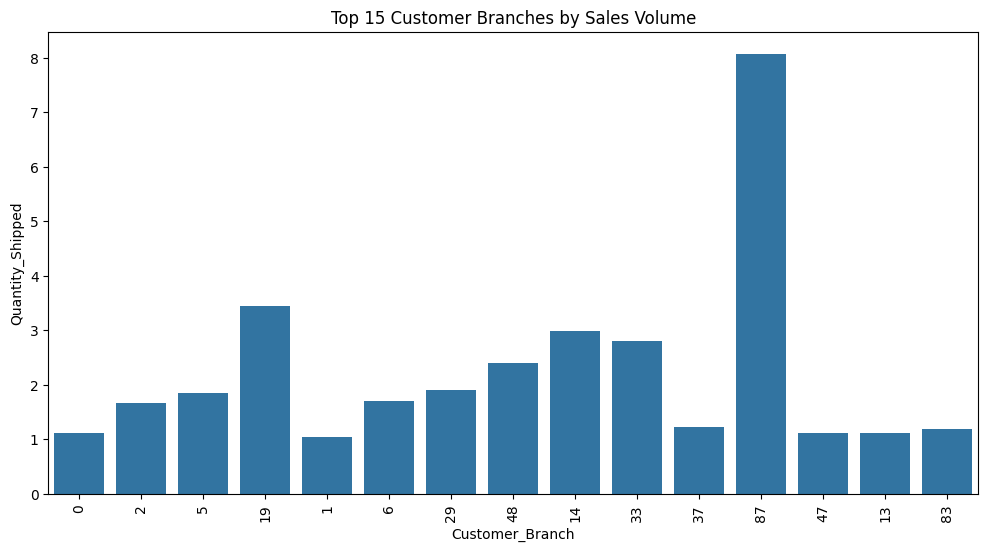

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_27115/260665059.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Customer_Branch', y='margin', data=df_top_15_sales, ci=None, color='green')


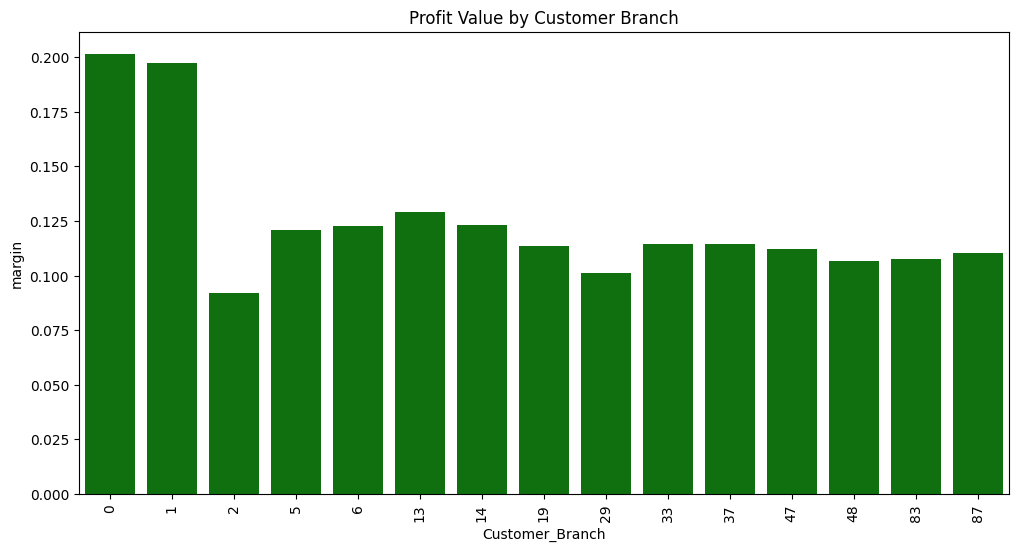

In [533]:
# Group by Customer_Branch and sum the Quantity_Shipped
top_15_sales_branches = df.groupby('Customer_Branch')['Quantity_Shipped'].sum().nlargest(15).reset_index()

# Filter the DataFrame to only include the top 15 branches
df_top_15_sales = df[df['Customer_Branch'].isin(top_15_sales_branches['Customer_Branch'])]

# Plot the bar chart for top 15 customer branches by sales volume
plt.figure(figsize=(12,6))
sns.barplot(x='Customer_Branch', y='Quantity_Shipped', data=df_top_15_sales, ci=None, order=top_15_sales_branches['Customer_Branch'])
plt.title('Top 15 Customer Branches by Sales Volume')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x='Customer_Branch', y='margin', data=df_top_15_sales, ci=None, color='green')
plt.title('Profit Value by Customer Branch')
plt.xticks(rotation=90)
plt.show()

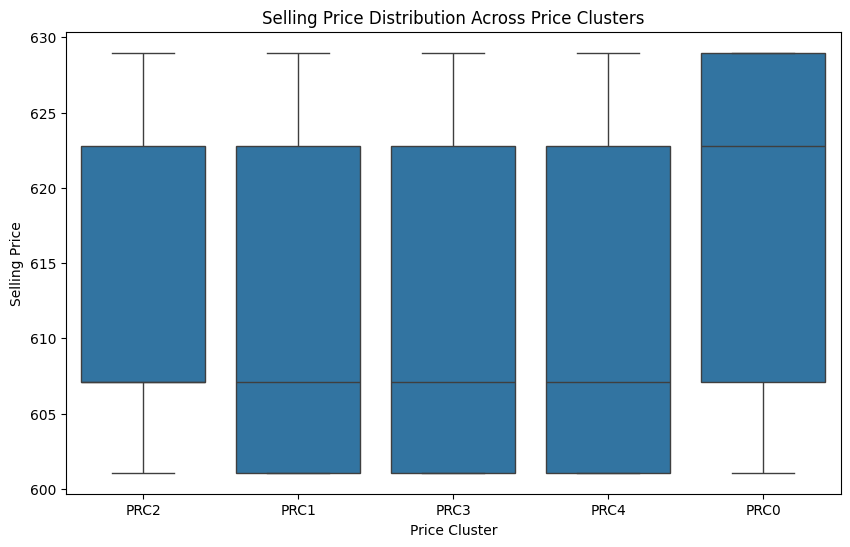

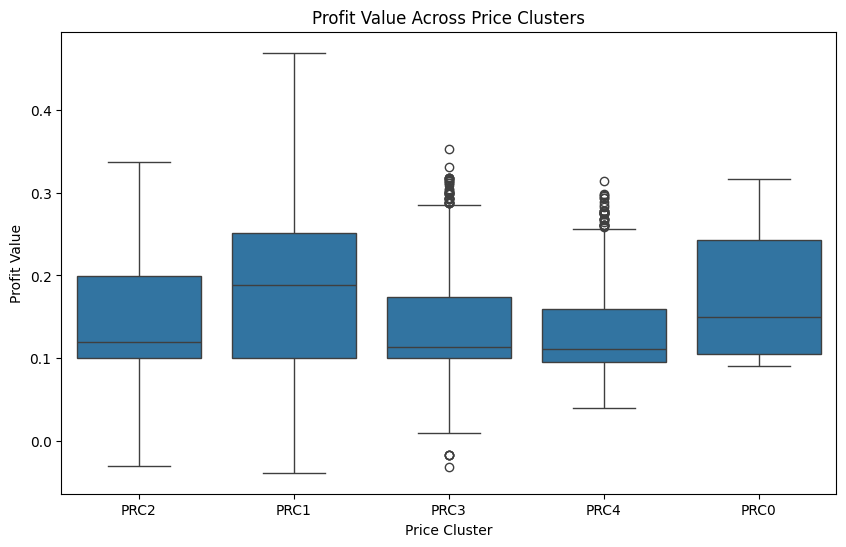

In [534]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Price_Cluster', y='Selling_Cost', data=df)
plt.title('Selling Price Distribution Across Price Clusters')
plt.xlabel('Price Cluster')
plt.ylabel('Selling Price')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Price_Cluster', y='margin', data=df)
plt.title('Profit Value Across Price Clusters')
plt.xlabel('Price Cluster')
plt.ylabel('Profit Value')
plt.show()


In [535]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 14 numerical features : ['Customer_Branch', 'Customer_LSTYR_Sales', 'Quantity_Shipped', 'Selling_Price', 'Selling_Cost', 'margin', 'Base_Price', 'DCOST', 'Customer_Salesman', 'Profit_value', 'Cost_after_Margin', 'Month', 'Year', 'Day']

We have 7 categorical features : ['Price_Cluster', 'Selling_Location', 'Location_Region', 'Territory_Salesperson', 'Territory_Names', 'Area_Manager', 'Area_Name']


In [536]:
# Encode categorical variables
#categorical_cols = ['Customer_Branch','Price_Cluster', 'Selling_Location', 'Location_Region']
for col in categorical_features:
    df[col] = LabelEncoder().fit_transform(df[col])

# Handle missing values if any
#df.fillna(0, inplace=True)

In [537]:
df.head()

,Customer_Branch,Customer_LSTYR_Sales,Quantity_Shipped,Selling_Price,Selling_Cost,margin,Base_Price,DCOST,Price_Cluster,Selling_Location,...,Customer_Salesman,Territory_Salesperson,Territory_Names,Area_Manager,Area_Name,Profit_value,Cost_after_Margin,Month,Year,Day
0,0,17.39,1,929.17,628.980,0.323073,929.17,628.98,2,45,...,154.0,315,19,25,24,203.206632,425.773368,6,2016,7
1,0,25813.55,1,943.96,607.070,0.356890,943.96,628.98,1,4,...,16.0,176,22,5,21,216.657287,390.412713,2,2015,20
2,0,83574.66,1,820.20,607.070,0.259851,820.20,628.98,1,35,...,109.0,347,22,5,21,157.747902,449.322098,1,2014,27
3,13,78834.74,1,868.80,622.748,0.283209,868.80,628.98,1,35,...,111.0,198,22,5,21,176.367853,446.380147,11,2015,18
4,22,79565.88,1,757.66,607.070,0.198757,757.66,628.98,1,35,...,3.0,347,22,5,21,120.659229,486.410771,11,2014,20


In [538]:
df.columns

Index(['Customer_Branch', 'Customer_LSTYR_Sales', 'Quantity_Shipped',
       'Selling_Price', 'Selling_Cost', 'margin', 'Base_Price', 'DCOST',
       'Price_Cluster', 'Selling_Location', 'Location_Region',
       'Customer_Salesman', 'Territory_Salesperson', 'Territory_Names',
       'Area_Manager', 'Area_Name', 'Profit_value', 'Cost_after_Margin',
       'Month', 'Year', 'Day'],
      dtype='object')

In [551]:
# Feature selection
features = ['Customer_Branch','Customer_LSTYR_Sales', 'Quantity_Shipped', 'Selling_Cost', 'Base_Price', 
            'DCOST', 'Price_Cluster', 'Selling_Location', 'Location_Region', 
            'Customer_Salesman', 'Territory_Salesperson', 'Area_Name','Area_Manager', 'Month', 'Year', 'Day','Selling_Price']
target = 'Profit_value'

# Split the data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [552]:
X_train.columns

Index(['Customer_Branch', 'Customer_LSTYR_Sales', 'Quantity_Shipped',
       'Selling_Cost', 'Base_Price', 'DCOST', 'Price_Cluster',
       'Selling_Location', 'Location_Region', 'Customer_Salesman',
       'Territory_Salesperson', 'Area_Name', 'Area_Manager', 'Month', 'Year',
       'Day', 'Selling_Price'],
      dtype='object')

In [574]:
# Create preprocessor
numeric_features = ['Customer_LSTYR_Sales', 'Quantity_Shipped', 'Selling_Cost', 'Base_Price', 'DCOST', 'Month', 'Year', 'Day']
categorical_features = ['Price_Cluster', 'Selling_Location', 'Location_Region', 
                        'Customer_Salesman', 'Territory_Salesperson', 'Area_Name','Area_Manager']

In [575]:
# Updated preprocessor with OrdinalEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features)
    ])

# Create a pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(objective='reg:squarederror', booster='gbtree', 
                                   n_estimators=400, enable_categorical=True, 
                                   learning_rate=0.1, max_depth=6))
])

In [576]:
# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)




In [577]:
# Evaluate the model
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")

Mean Squared Error (MSE): 494.0962814833697
Mean Absolute Error (MAE): 13.192381527995101
R^2 Score: 0.7349690428327682


In [579]:
## Consider Calculated using the y_pred
X_test['Selling_Price'] = df.loc[X_test.index, 'Selling_Price']


In [580]:
# Feature importance
feature_importance = model.named_steps['regressor'].feature_importances_
feature_names = (numeric_features + 
                 model.named_steps['preprocessor']
                     .named_transformers_['cat']
                     .get_feature_names_out(categorical_features).tolist())

importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
importance_df = importance_df.sort_values('importance', ascending=False)

print("Top 10 most important features:")
print(importance_df.head(10))


Top 10 most important features:
                  feature  importance
0    Customer_LSTYR_Sales    0.260863
8           Price_Cluster    0.148487
3              Base_Price    0.083465
14           Area_Manager    0.073757
11      Customer_Salesman    0.067754
6                    Year    0.064709
12  Territory_Salesperson    0.058616
10        Location_Region    0.051471
9        Selling_Location    0.050279
13              Area_Name    0.045783


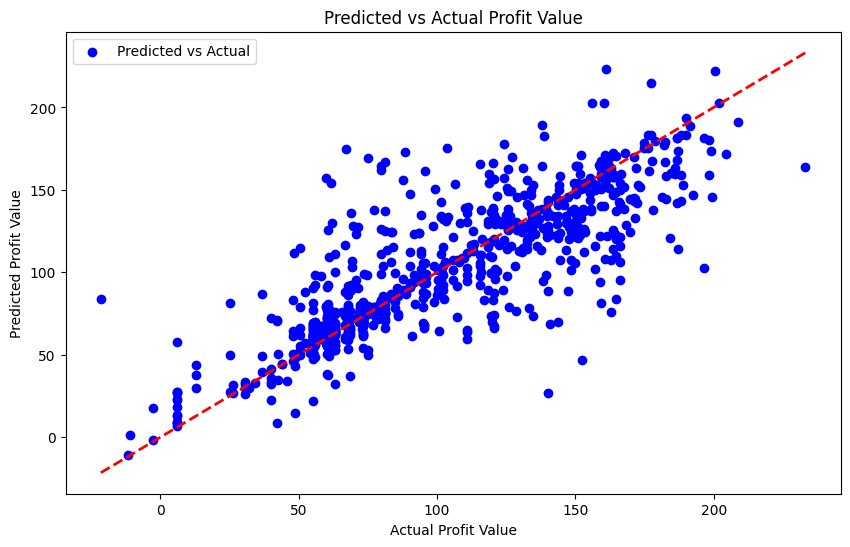

In [581]:
# Plot predictions vs actual values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual Profit Value')
plt.ylabel('Predicted Profit Value')
plt.title('Predicted vs Actual Profit Value')
plt.legend()
plt.show()

In [584]:
df

,Customer_Branch,Customer_LSTYR_Sales,Quantity_Shipped,Selling_Price,Selling_Cost,margin,Base_Price,DCOST,Price_Cluster,Selling_Location,...,Customer_Salesman,Territory_Salesperson,Territory_Names,Area_Manager,Area_Name,Profit_value,Cost_after_Margin,Month,Year,Day
0,0,17.39,1,929.17,628.980,0.323073,929.17,628.98,2,45,...,154.0,315,19,25,24,203.206632,425.773368,6,2016,7
1,0,25813.55,1,943.96,607.070,0.356890,943.96,628.98,1,4,...,16.0,176,22,5,21,216.657287,390.412713,2,2015,20
2,0,83574.66,1,820.20,607.070,0.259851,820.20,628.98,1,35,...,109.0,347,22,5,21,157.747902,449.322098,1,2014,27
3,13,78834.74,1,868.80,622.748,0.283209,868.80,628.98,1,35,...,111.0,198,22,5,21,176.367853,446.380147,11,2015,18
4,22,79565.88,1,757.66,607.070,0.198757,757.66,628.98,1,35,...,3.0,347,22,5,21,120.659229,486.410771,11,2014,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,0,8875.18,1,775.45,620.360,0.200000,934.76,628.98,1,99,...,1060.0,202,23,7,25,124.072000,496.288000,2,2016,17
5325,0,4662.08,1,811.32,620.360,0.235370,811.32,628.98,2,167,...,8812.0,62,1,14,23,146.013836,474.346164,1,2016,26
5326,0,157.18,1,898.54,628.980,0.299998,1015.01,628.98,0,165,...,322.0,232,22,5,21,188.692600,440.287400,8,2016,17
5327,0,950.44,1,811.32,622.748,0.232426,811.32,628.98,2,211,...,1355.0,57,21,0,5,144.742932,478.005068,12,2015,10


In [587]:
# Function to suggest optimal price
def suggest_optimal_price(row, model, min_profit_margin=0.20, max_discount=0.20):
    current_price = row['Selling_Price']
    current_cost = row['Selling_Cost']
    base_price = row['Base_Price']
    
    min_price = max(current_cost * (1 + min_profit_margin), base_price * (1 - max_discount))
    max_price = base_price
    
    prices = np.linspace(min_price, max_price, 100)
    max_profit = 0
    optimal_price = current_price
    
    for price in prices:
        row['Selling_Price'] = price
        predicted_profit = model.predict(row[features].to_frame().T)[0]
        if predicted_profit > max_profit:
            max_profit = predicted_profit
            optimal_price = price
    
    return optimal_price

In [588]:
# Apply the function to the test set
X_test['Optimal_Price'] = X_test.apply(lambda row: suggest_optimal_price(row, model), axis=1)

# Calculate potential improvement
X_test['Current_Profit'] = X_test['Selling_Price'] - X_test['Selling_Cost']
X_test['Potential_Profit'] = X_test['Optimal_Price'] - X_test['Selling_Cost']
X_test['Profit_Improvement'] = X_test['Potential_Profit'] - X_test['Current_Profit']

print("Average potential profit improvement:", X_test['Profit_Improvement'].mean())
print("Total potential profit improvement:", X_test['Profit_Improvement'].sum())


Average potential profit improvement: 9.169157973733576
Total potential profit improvement: 9774.322399999992


In [568]:
# Generate pricing guidelines
def generate_pricing_guidelines(row):
    if row['Profit_Improvement'] > 0:
        return f"Consider pricing between {row['Selling_Cost'] * 1.10:.2f} and {row['Optimal_Price']:.2f}. " \
               f"Optimal price: {row['Optimal_Price']:.2f}. Potential profit increase: {row['Profit_Improvement']:.2f}"
    else:
        return "Current pricing is optimal"

X_test['Pricing_Guideline'] = X_test.apply(generate_pricing_guidelines, axis=1)

# Display sample guidelines
print("\nSample Pricing Guidelines:")
print(X_test[['Selling_Price', 'Optimal_Price', 'Profit_Improvement', 'Pricing_Guideline']].head())


Sample Pricing Guidelines:
      Selling_Price  Optimal_Price  Profit_Improvement  \
1323         707.15         773.75               66.60   
1839         694.78         817.45              122.67   
798          667.84         742.80               74.96   
3855         725.00         857.72              132.72   
4552         914.68         914.68                0.00   

                                      Pricing_Guideline  
1323  Consider pricing between 667.78 and 773.75. Op...  
1839  Consider pricing between 661.17 and 817.45. Op...  
798   Consider pricing between 667.78 and 742.80. Op...  
3855  Consider pricing between 691.88 and 857.72. Op...  
4552                         Current pricing is optimal  


In [595]:
X_test.head(10)

,Customer_Branch,Customer_LSTYR_Sales,Quantity_Shipped,Selling_Cost,Base_Price,DCOST,Price_Cluster,Selling_Location,Location_Region,Customer_Salesman,...,Area_Manager,Month,Year,Day,Selling_Price,Optimal_Price,Current_Profit,Potential_Profit,Profit_Improvement,Pricing_Guideline
1323,12,NaN,2,607.070,773.75,628.98,4,62,1,NaN,...,3,4,2014,17,707.15,728.4840,100.080,121.4140,21.3340,Consider pricing between 667.78 and 728.48. Op...
1839,0,NaN,1,601.067,817.45,628.98,2,157,3,NaN,...,14,4,2013,1,694.78,721.2804,93.713,120.2134,26.5004,Consider pricing between 661.17 and 721.28. Op...
798,196,NaN,1,607.070,742.80,628.98,1,210,2,NaN,...,20,5,2014,1,667.84,728.4840,60.770,121.4140,60.6440,Consider pricing between 667.78 and 728.48. Op...
3855,0,51290.53,1,628.980,857.72,628.98,3,212,1,3031.0,...,3,5,2016,12,725.00,754.7760,96.020,125.7960,29.7760,Consider pricing between 691.88 and 754.78. Op...
4552,0,20458.65,1,628.980,914.68,628.98,3,118,3,7261.0,...,2,7,2016,25,914.68,754.7760,285.700,125.7960,-159.9040,Current base pricing is optimal
856,5,NaN,1,607.070,757.66,628.98,3,97,0,NaN,...,21,7,2014,31,667.84,728.4840,60.770,121.4140,60.6440,Consider pricing between 667.78 and 728.48. Op...
2333,404,NaN,1,628.980,718.68,628.98,3,93,3,NaN,...,2,6,2016,7,718.68,754.7760,89.700,125.7960,36.0960,Consider pricing between 691.88 and 754.78. Op...
2499,26,NaN,1,628.980,694.98,628.98,4,62,1,NaN,...,3,4,2016,14,694.98,754.7760,66.000,125.7960,59.7960,Consider pricing between 691.88 and 754.78. Op...
5010,15,NaN,1,628.980,749.80,628.98,2,164,3,NaN,...,14,10,2016,10,749.80,754.7760,120.820,125.7960,4.9760,Consider pricing between 691.88 and 754.78. Op...
4379,5,23081.63,1,628.980,821.83,628.98,2,211,2,1362.0,...,0,7,2016,7,792.14,754.7760,163.160,125.7960,-37.3640,Current base pricing is optimal
